<a href="https://colab.research.google.com/github/SahithiDuppati/Machine_Learning_With_Python/blob/main/Machine_Learning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning with Python

### Tensors

Types of Tensors - Tensor Declaration

In [ ]:
import tensorflow as tf
a = tf.Variable("string", tf.string)
print(a)

<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'string'>


Reshaping tensors

In [ ]:
tensor = tf.ones([2,2,2])
print(tensor)
tensor = tf.reshape(tensor,[8])
print(tensor)

tf.Tensor(
[[[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]], shape=(2, 2, 2), dtype=float32)
tf.Tensor([1. 1. 1. 1. 1. 1. 1. 1.], shape=(8,), dtype=float32)


TensorFlow Algorithms

*   Linear Regression
*   Classification
*   Clustering
*   Hidden Markov Models



### Linear Regression
(Line of best fit)


In [ ]:
#SetUp and Imports
!pip install -q sklearn

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np #matrix operations
import pandas as pd #data set import and visualizations
import matplotlib.pyplot as plt #graphs
from IPython.display import clear_output #specific for ouptput in notebook
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

California Housing Dataset

In [ ]:
dtrain = pd.read_csv('/content/sample_data/california_housing_train.csv')
dtest = pd.read_csv('/content/sample_data/california_housing_train.csv')
print(dtrain.head())
y_train = dtrain.pop('housing_median_age')
y_test = dtest.pop('housing_median_age')
print(dtrain.head())
print(y_train)
print(dtrain.loc[0], y_train.loc[0])
print(dtrain["population"])

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  
   longitude  latitude  total_rooms  total_bedrooms  population  households  \
0    -114.31     34.19       5612.0          1283.0      1015.0       472.0   
1    -114.47 

In [ ]:
dtrain = pd.read_csv('/content/sample_data/california_housing_train.csv')
dtrain.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
dtrain.shape

(17000, 9)

<Axes: >

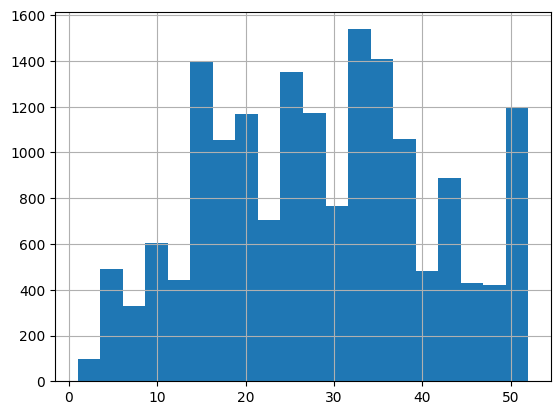

In [ ]:
dtrain.housing_median_age.hist(bins=20)

<Axes: >

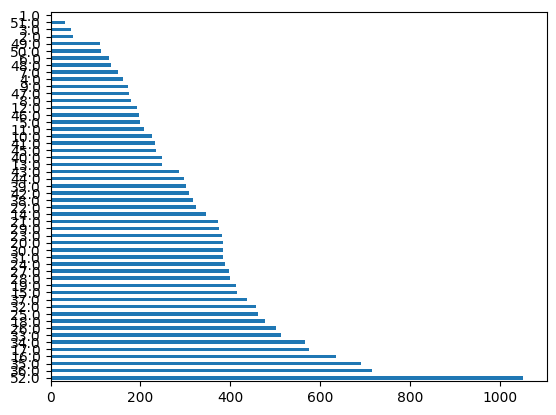

In [ ]:
dtrain.housing_median_age.value_counts().plot(kind='barh')

Types of Information in dataset
*   Categorical
*   Numeric



In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic.csv')
dataframe.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [ ]:
val_dataframe = dataframe.sample(frac=0.2, random_state=1337)
train_dataframe = dataframe.drop(val_dataframe.index)

print(
    "Using %d samples for training and %d for validation"
    % (len(train_dataframe), len(val_dataframe))
)

Using 713 samples for training and 178 for validation


Handling Null Data

In [ ]:
# print(dataframe[dataframe.isnull().any(axis=1)])/
dataframe.isnull().sum()

index       0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
who         0
alone       0
dtype: int64

In [ ]:
dataframe['age'].ffill()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    19.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [ ]:

#dataframe.dropna(how="any",inplace=True)
# dataframe.pop("embarked")
# dataframe['age'].ffill()
# dataframe['age].bfill()
# dataframe['age'].fillna(dataframe['age'].median(), inplace = True)
# dataframe.groupby(['pclass', 'alive'])['age'].mean()
dataframe['embarked'] = dataframe['embarked'].astype('category')
dataframe['embarked'] = dataframe['embarked'].cat.codes
dataframe['embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: embarked, Length: 891, dtype: int8

In [ ]:
dataframe['sex'] = dataframe['sex'].astype('category')
dataframe['sex'] = dataframe['sex'].cat.codes
dataframe['sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: sex, Length: 891, dtype: int8

In [ ]:
dataframe['who'] = dataframe['who'].astype('category')
dataframe['who'] = dataframe['who'].cat.codes
dataframe['who']

0      1
1      2
2      2
3      2
4      1
      ..
886    1
887    2
888    2
889    1
890    1
Name: who, Length: 891, dtype: int8

In [ ]:
dataframe['class'] = dataframe['class'].astype('category')
dataframe['class'] = dataframe['class'].cat.codes
dataframe['class']

0      2
1      0
2      2
3      0
4      2
      ..
886    1
887    0
888    2
889    0
890    2
Name: class, Length: 891, dtype: int8

In [ ]:
dataframe['alone'] = dataframe['alone'].astype('category')
dataframe['alone'] = dataframe['alone'].cat.codes
dataframe['alone']

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: alone, Length: 891, dtype: int8

In [ ]:
dataframe['age'] = dataframe['age'].ffill()

In [ ]:
dataframe.age = dataframe.age.astype(int)
dataframe.fare = dataframe.fare.astype(int)
print(dataframe['survived'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64


In [ ]:
dataframe = dataframe.reset_index()

In [ ]:
dataframe.columns

Index(['index', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class',
       'who', 'alone', 'survived'],
      dtype='object')

In [ ]:
dataframe.get('survived')

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [ ]:
dataframe.head()

,index,sex,age,sibsp,parch,fare,embarked,class,who,alone
0,0,1,22,1,0,7,2,2,1,0
1,1,0,38,1,0,71,0,0,2,0
2,2,0,26,0,0,7,2,2,2,1
3,3,0,35,1,0,53,2,0,2,0
4,4,1,35,0,0,8,2,2,1,1


In [ ]:
labels = dataframe.pop('survived')

In [ ]:
tf.convert_to_tensor(dataframe,dtype = tf.int32)

<tf.Tensor: shape=(891, 10), dtype=int32, numpy=
array([[  0,   1,  22, ...,   2,   1,   0],
       [  1,   0,  38, ...,   0,   2,   0],
       [  2,   0,  26, ...,   2,   2,   1],
       ...,
       [888,   0,  19, ...,   2,   2,   0],
       [889,   1,  26, ...,   0,   1,   1],
       [890,   1,  32, ...,   2,   1,   1]], dtype=int32)>

In [ ]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds


train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)

ValueError: ignored

In [ ]:
import tensorflow.compat.v1 as tf1

In [ ]:
# Categorical_Columns = ['sex', 'fare', 'class', 'who', 'alone']
# Numeric_Columns = ['age', 'sibsp', 'survived']
# feature_columns = []
# for feature_name in Categorical_Columns:
#   vocabulary = dtrain[feature_name].unique()
#   feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

# for feature_name in Numeric_Columns:
#   feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

# print(feature_columns)

In [ ]:
from keras.utils import FeatureSpace
feature_space = FeatureSpace(
    features={
        "fare": "float_normalized",
        "sex": "string_categorical",
        "class": "string_categorical",
        "who": "string_categorical",
        "alone": "string_categorical",
        "age": "integer_categorical",
        "survived": "integer_categorical",
    },
    crosses=None,
    output_mode="concat",
)
feature_space.adapt(dtrain)

ValueError: ignored

#Rough ----------END-----------

In [3]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic.csv')
dataframe.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [4]:
dataframe.isnull().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64

In [5]:
dataframe['age'] = dataframe['age'].ffill()

In [6]:
dataframe['embarked'] = dataframe['embarked'].astype('category')
dataframe['embarked'] = dataframe['embarked'].cat.codes
dataframe['embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: embarked, Length: 891, dtype: int8

In [7]:
dataframe['alone'] = dataframe['alone'].astype('category')
dataframe['alone'] = dataframe['alone'].cat.codes
dataframe['alone']

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: alone, Length: 891, dtype: int8

In [8]:
dataframe = dataframe.reset_index()

In [9]:
dataframe.dropna(inplace=True)

In [10]:
val_dataframe = dataframe.sample(frac=0.2, random_state=1337)
train_dataframe = dataframe.drop(val_dataframe.index)

print(
    "Using %d samples for training and %d for validation"
    % (len(train_dataframe), len(val_dataframe))
)

Using 713 samples for training and 178 for validation


In [11]:
def dataframe_to_dataset(df):
    df = df.copy()
    labels = df.pop('survived')
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    ds = ds.shuffle(buffer_size=len(df))
    return ds


train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)

In [12]:
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)

In [13]:
for x,y in train_ds.take(1):
  print("Input:",x)
  print("Target:",y)

Input: {'index': <tf.Tensor: shape=(32,), dtype=int64, numpy=
array([351, 306, 825, 855, 724, 257, 125, 744, 600, 456, 247, 252,  64,
       243, 308, 438, 872, 153, 518, 602, 764, 852, 428, 335, 325, 731,
       462, 378, 225, 749, 717,  23])>, 'sex': <tf.Tensor: shape=(32,), dtype=string, numpy=
array([b'male', b'female', b'male', b'female', b'male', b'female',
       b'male', b'male', b'female', b'male', b'female', b'male', b'male',
       b'male', b'male', b'male', b'male', b'male', b'female', b'male',
       b'male', b'female', b'male', b'male', b'female', b'male', b'male',
       b'male', b'male', b'male', b'female', b'male'], dtype=object)>, 'age': <tf.Tensor: shape=(32,), dtype=float64, numpy=
array([23.  ,  0.92,  2.  , 18.  , 27.  , 30.  , 12.  , 31.  , 24.  ,
       65.  , 24.  , 62.  ,  4.  , 22.  , 30.  , 64.  , 33.  , 40.5 ,
       36.  , 24.  , 16.  ,  9.  , 19.  , 16.  , 36.  , 11.  , 47.  ,
       20.  , 22.  , 31.  , 27.  , 28.  ])>, 'sibsp': <tf.Tensor: shape=(32,), 

In [14]:
train_dataframe.head()

,index,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,0,male,22.0,1,0,7.2500,2,Third,man,0,0
1,1,female,38.0,1,0,71.2833,0,First,woman,0,1
4,4,male,35.0,0,0,8.0500,2,Third,man,1,0
5,5,male,35.0,0,0,8.4583,1,Third,man,1,0
6,6,male,54.0,0,0,51.8625,2,First,man,1,0


In [110]:
# dataframe.age = dataframe.age.astype(int)

In [15]:
from keras.utils import FeatureSpace
feature_space = FeatureSpace(
    features={
        "index":"integer_categorical",
        "sex": "string_categorical",
        "age": "float_discretized",
        "sibsp":"integer_categorical",
        "parch":"integer_categorical",
        "fare": "float_normalized",
        "embarked":"integer_categorical",
        "class": "string_categorical",
        "who": "string_categorical",
        "alone": "integer_categorical",
    },
    crosses=None,
    output_mode="concat",
)

In [16]:
print(train_ds)

<_BatchDataset element_spec=({'index': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'sex': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'sibsp': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'parch': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fare': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'embarked': TensorSpec(shape=(None,), dtype=tf.int8, name=None), 'class': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'who': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'alone': TensorSpec(shape=(None,), dtype=tf.int8, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [17]:
train_ds_with_no_labels = train_ds.map(lambda x, _:x)

print(train_ds_with_no_labels)

<_MapDataset element_spec={'index': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'sex': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'sibsp': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'parch': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fare': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'embarked': TensorSpec(shape=(None,), dtype=tf.int8, name=None), 'class': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'who': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'alone': TensorSpec(shape=(None,), dtype=tf.int8, name=None)}>


In [18]:
feature_space.adapt(train_ds_with_no_labels)

In [19]:
train_ds.take(1)

<_TakeDataset element_spec=({'index': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'sex': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'sibsp': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'parch': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fare': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'embarked': TensorSpec(shape=(None,), dtype=tf.int8, name=None), 'class': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'who': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'alone': TensorSpec(shape=(None,), dtype=tf.int8, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [20]:
preprocessed_train_ds = train_ds.map(
    lambda x,y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE
)
preprocessed_train_ds = preprocessed_train_ds.prefetch(tf.data.AUTOTUNE)

preprocessed_val_ds = val_ds.map(
    lambda x,y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE
)
preprocessed_val_ds = preprocessed_val_ds.prefetch(tf.data.AUTOTUNE)

Model Building

In [21]:
from tensorflow import keras

In [22]:
dict_inputs = feature_space.get_inputs()
encoded_features = feature_space.get_encoded_features()

x = keras.layers.Dense(32, activation="relu")(encoded_features)
x = keras.layers.Dropout(0.5)(x)
predictions = keras.layers.Dense(1, activation="sigmoid")(x)

training_model = keras.Model(inputs=encoded_features, outputs=predictions)
training_model.compile(
    optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"]
)

inference_model = keras.Model(inputs=dict_inputs, outputs=predictions)

Model Training

In [23]:
training_model.fit(
    preprocessed_train_ds, epochs=20, validation_data=preprocessed_val_ds, verbose=2
)

Epoch 1/20
23/23 - 2s - loss: 0.6486 - accuracy: 0.6606 - val_loss: 0.6034 - val_accuracy: 0.7584 - 2s/epoch - 86ms/step
Epoch 2/20
23/23 - 0s - loss: 0.5748 - accuracy: 0.7349 - val_loss: 0.5533 - val_accuracy: 0.7697 - 283ms/epoch - 12ms/step
Epoch 3/20
23/23 - 0s - loss: 0.5188 - accuracy: 0.7728 - val_loss: 0.5220 - val_accuracy: 0.7809 - 273ms/epoch - 12ms/step
Epoch 4/20
23/23 - 0s - loss: 0.4830 - accuracy: 0.7966 - val_loss: 0.5008 - val_accuracy: 0.7978 - 290ms/epoch - 13ms/step
Epoch 5/20
23/23 - 0s - loss: 0.4584 - accuracy: 0.8079 - val_loss: 0.4861 - val_accuracy: 0.7978 - 272ms/epoch - 12ms/step
Epoch 6/20
23/23 - 0s - loss: 0.4402 - accuracy: 0.8135 - val_loss: 0.4798 - val_accuracy: 0.8034 - 267ms/epoch - 12ms/step
Epoch 7/20
23/23 - 0s - loss: 0.4180 - accuracy: 0.8345 - val_loss: 0.4732 - val_accuracy: 0.8034 - 268ms/epoch - 12ms/step
Epoch 8/20
23/23 - 0s - loss: 0.4201 - accuracy: 0.8205 - val_loss: 0.4685 - val_accuracy: 0.8034 - 274ms/epoch - 12ms/step
Epoch 9/20


In [24]:
train_dataframe.head()

,index,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,0,male,22.0,1,0,7.2500,2,Third,man,0,0
1,1,female,38.0,1,0,71.2833,0,First,woman,0,1
4,4,male,35.0,0,0,8.0500,2,Third,man,1,0
5,5,male,35.0,0,0,8.4583,1,Third,man,1,0
6,6,male,54.0,0,0,51.8625,2,First,man,1,0


In [25]:
sample = {
    "index":700,
    "age": 60,
    "sex": "female",
    "sibsp": 1,
    "parch": 0,
    "fare": 52.08,
    "embarked": 1,
    "class": "First",
    "who": "woman",
    "alone": 0,
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = inference_model.predict(input_dict)

print(
    f"This particular traveller has a {100 * predictions[0][0]:.2f}% probability "
    "of survival, as evaluated by our model."
)

1/1 [==============================] - 0s 413ms/step
This particular traveller has a 88.63% probability of survival, as evaluated by our model.
